# Machin Learning

# LinearRegression

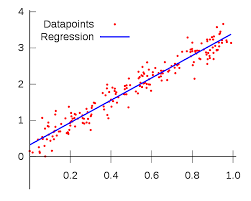

Step 1: import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

step2: import Data

In [2]:
usahousing=pd.read_csv('USA_Housing.csv')

In [3]:
usahousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
usahousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
usahousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


step 3: visualization

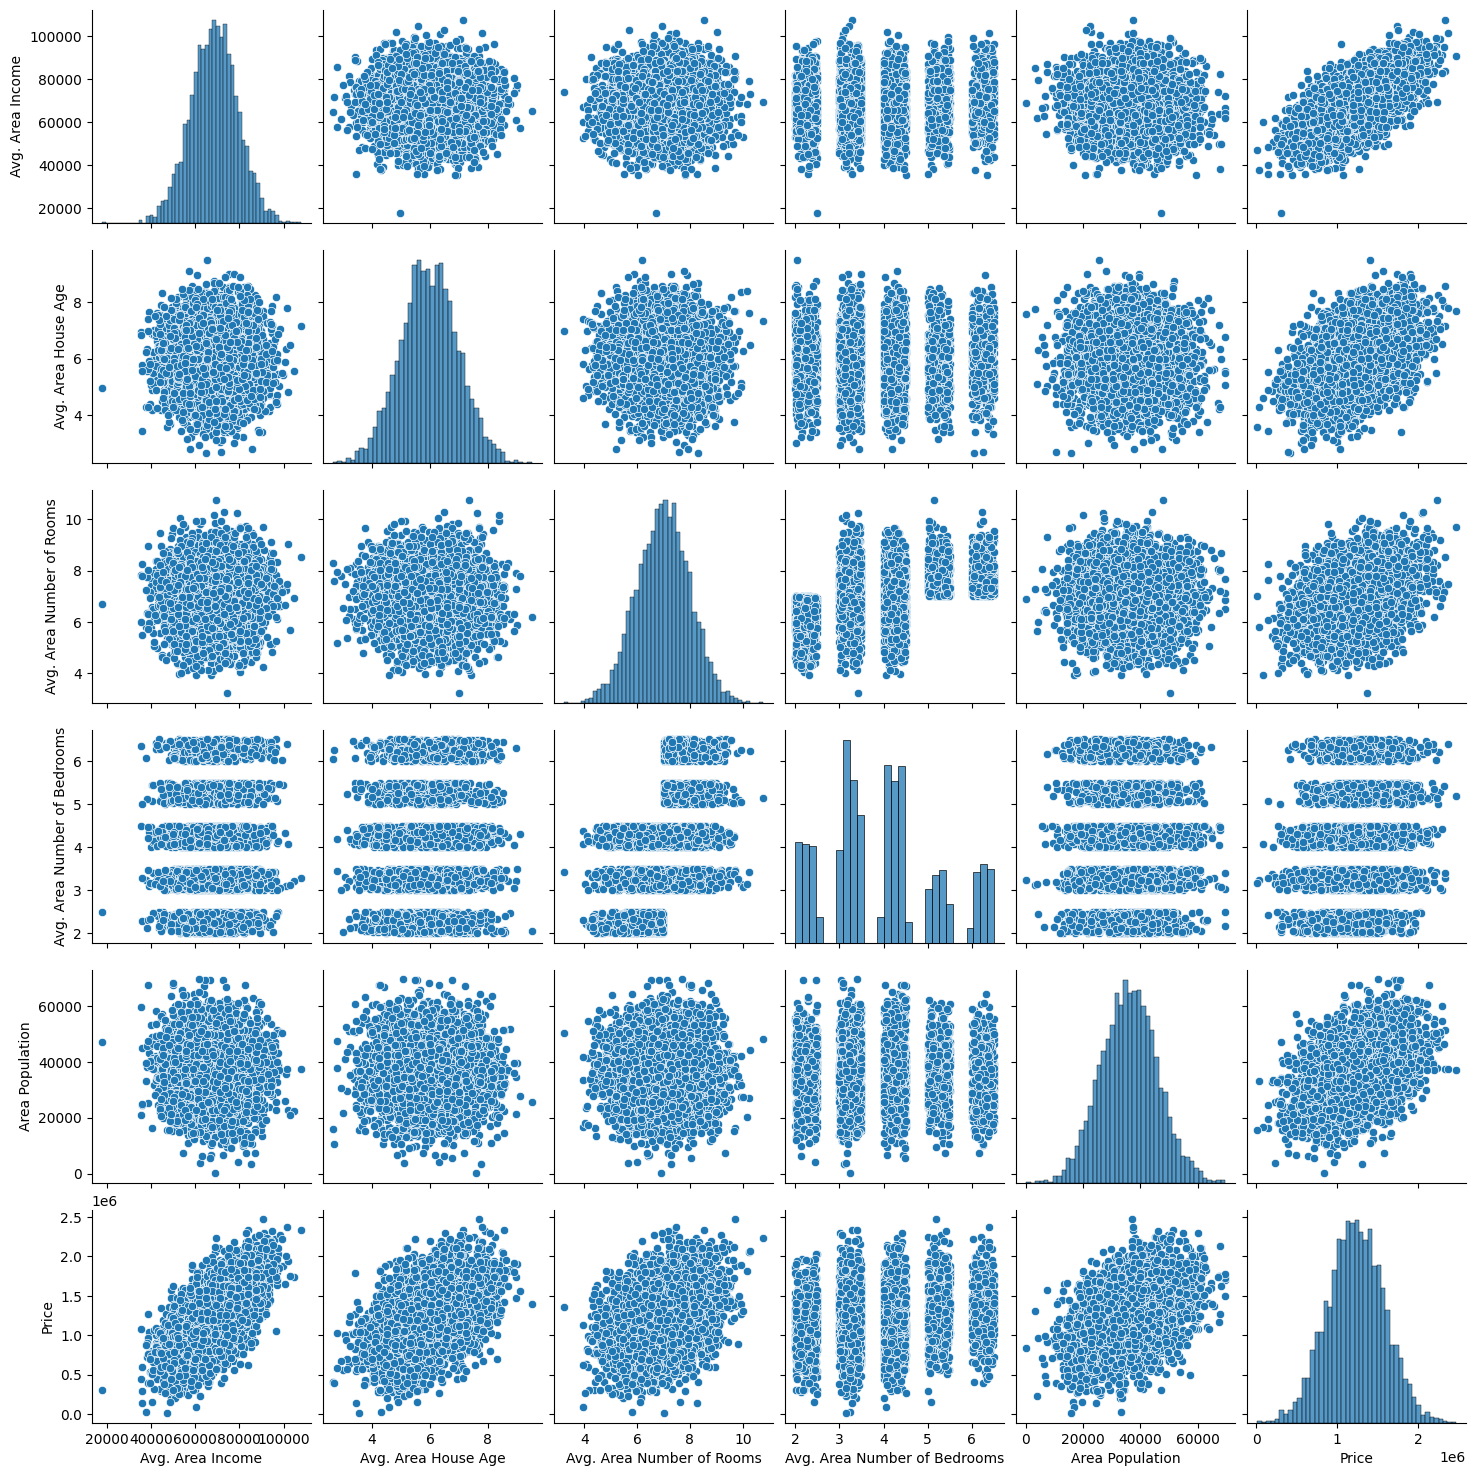

In [6]:
sns.pairplot(usahousing)

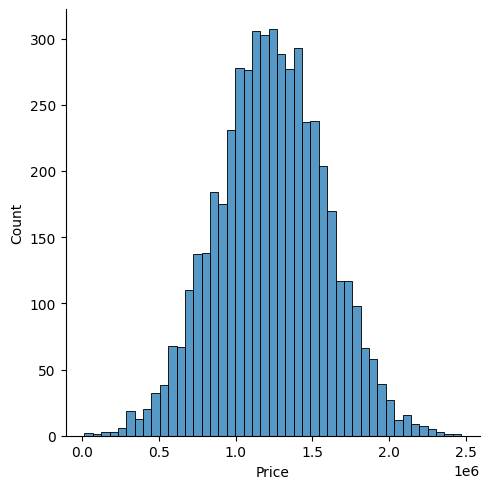

In [7]:
sns.displot(usahousing['Price'])

<AxesSubplot:>

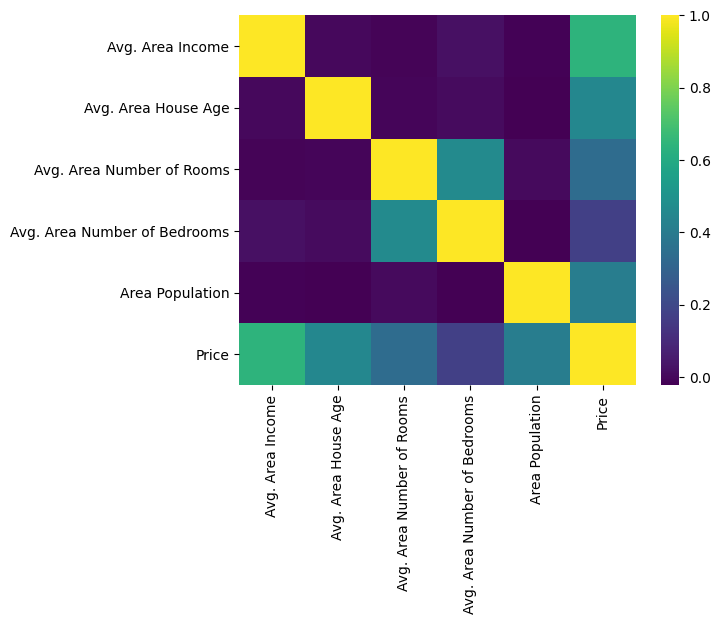

In [8]:
sns.heatmap(usahousing.corr(),cmap='viridis')

# ML_part

## Step1: Seperate data (feature selection)<br>
-seperate Labels<br>
-seperate Numeric data<br>
-create x&y

In [9]:
x=usahousing[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
             'Area Population']]
y=usahousing['Price']

## step2: train and test data

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

## step3: creating and training model

In [11]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## step4: model evaluation

In [12]:
print(lm.intercept_)

-2640159.7968526953


In [13]:
coeff_dt=pd.DataFrame(lm.coef_,x.columns,columns=['coefficient'])
coeff_dt

,coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## step5: Prediction from our model

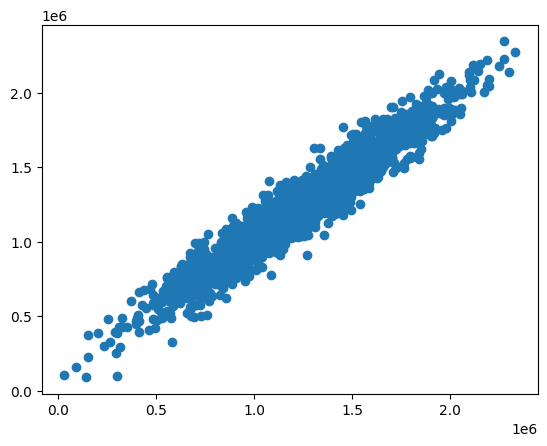

In [14]:
prediction=lm.predict(x_test)

plt.scatter(y_test,prediction)

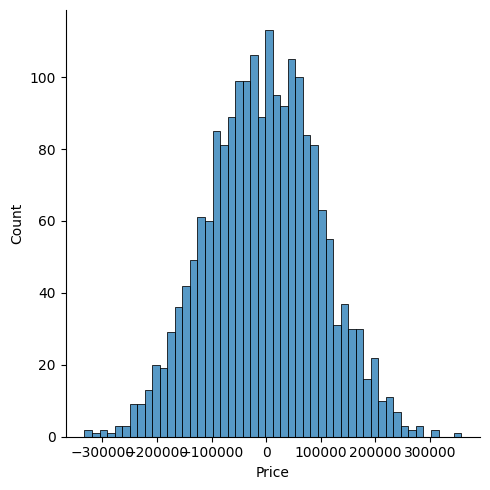

In [15]:
sns.displot((y_test-prediction),bins=50)

In [16]:
D=pd.DataFrame({'label':y_test,'pred':prediction})
D


,label,pred
1718,1.251689e+06,1.260961e+06
2511,8.730483e+05,8.275888e+05
345,1.696978e+06,1.742421e+06
2521,1.063964e+06,9.746254e+05
54,9.487883e+05,9.987178e+05
...,...,...
1776,1.489520e+06,1.515043e+06
4269,7.777336e+05,7.460118e+05
1661,1.515271e+05,3.721914e+05
2410,1.343824e+06,1.365217e+06


## step6: prediction metrics (evaluation)

In [17]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 82288.22251914942
MSE: 10460958907.20898
RMSE: 102278.82922290899


تمرین: تمام مراحل داده شده را برای دیتای زیر انجام دهید و نتیجه را بررسی کنید:<br>
Ecommerce customer

In [18]:
customers=pd.read_csv("Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# logistic regression<br>
here we have 3 models for evaluation:<br>
1-score<br>
2-confussion matrix<br>
3-classification report

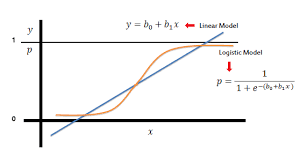

In [19]:
titanic=pd.read_csv('titanic.csv')

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## missing data

In [23]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

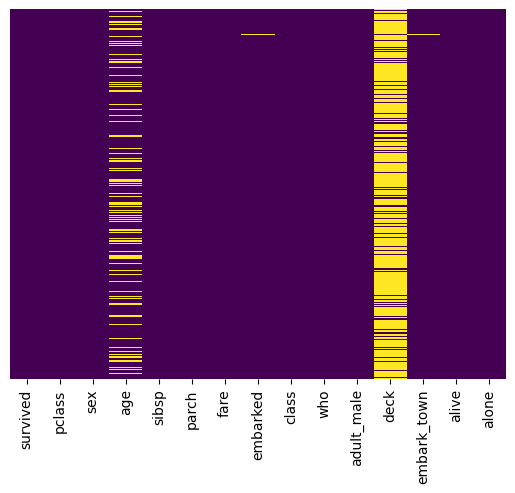

In [26]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

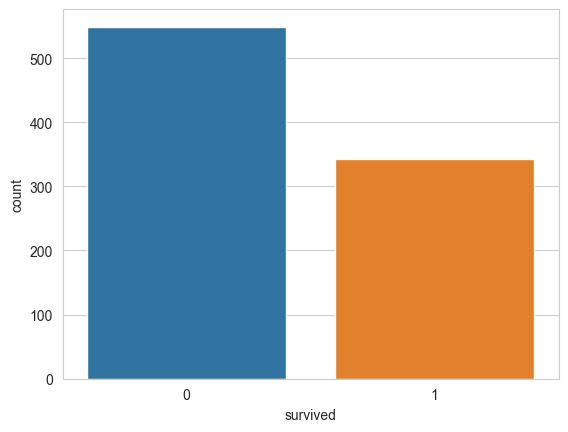

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

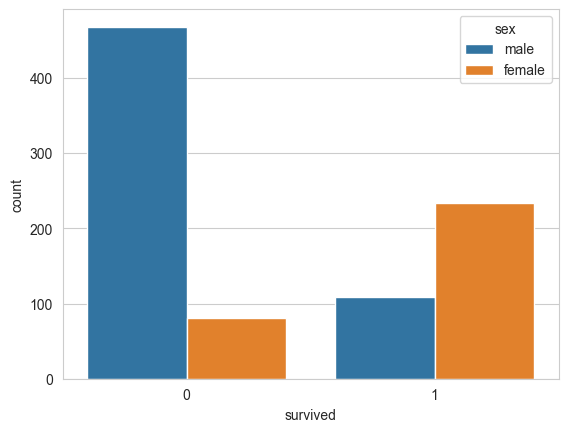

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

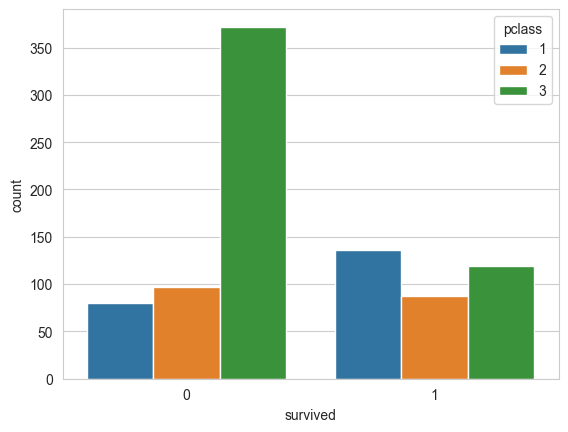

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=titanic)

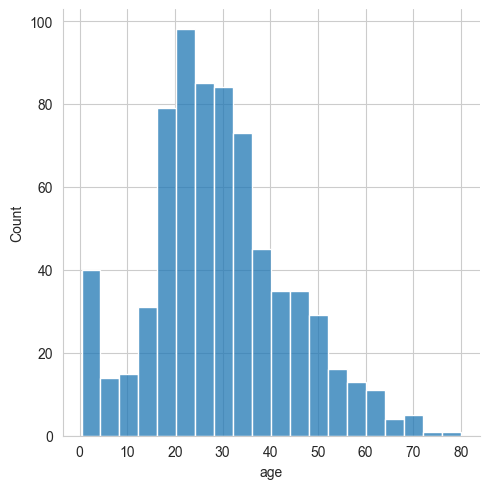

In [30]:
sns.displot(titanic['age'])

<AxesSubplot:>

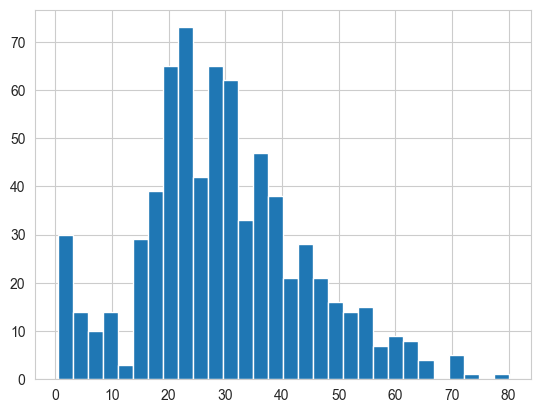

In [31]:
titanic['age'].hist(bins=30)

<AxesSubplot:>

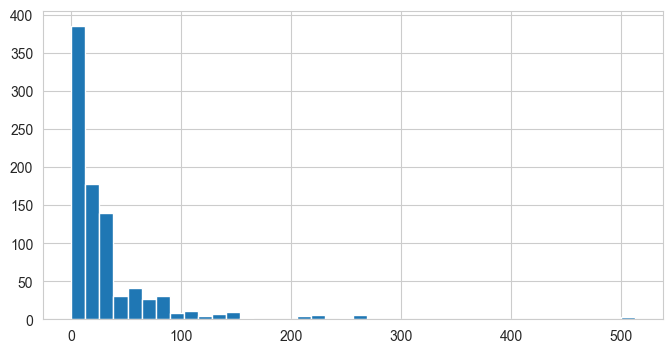

In [32]:
titanic['fare'].hist(bins=40,figsize=(8,4))

## data cleaning

<AxesSubplot:xlabel='pclass', ylabel='age'>

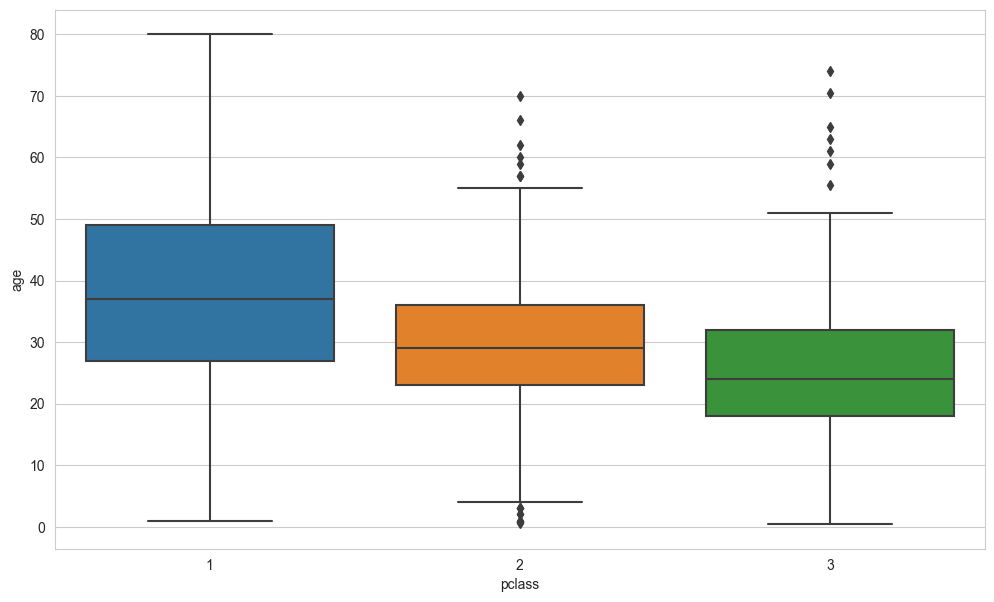

In [33]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=titanic)

In [35]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    for i in range(titanic.count().max()):
        if pd.isnull(age):
            if pclass==1:
                return titanic[titanic['pclass']==1]['age'].mean()
            elif pclass==2:
                return titanic[titanic['pclass']==2]['age'].mean()
            elif pclass==3:
                return titanic[titanic['pclass']==3]['age'].mean()
        else:
            return age



titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

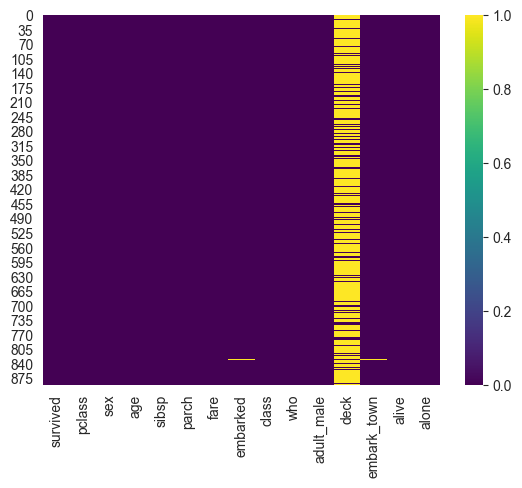

In [36]:
sns.heatmap(titanic.isnull(),cmap='viridis')

<AxesSubplot:>

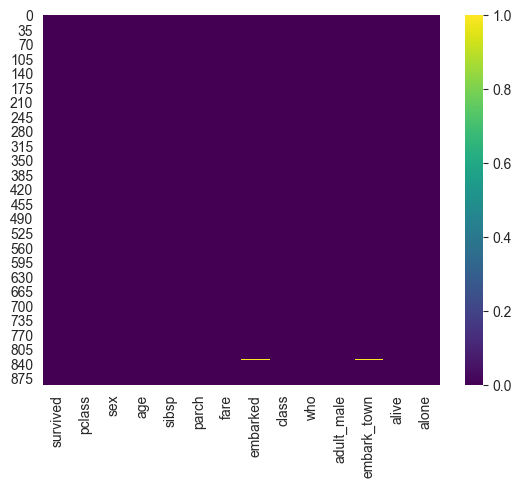

In [37]:
titanic.drop('deck',axis=1,inplace=True)
sns.heatmap(titanic.isnull(),cmap='viridis')

<AxesSubplot:>

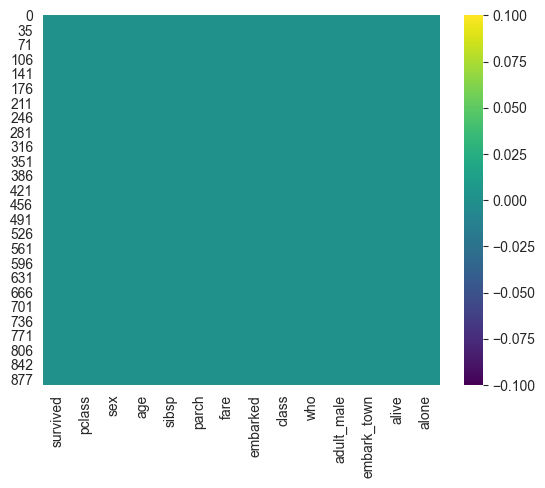

In [38]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(),cmap='viridis')

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


# converting categorical features

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [41]:
sex=pd.get_dummies(titanic['sex'],drop_first=True)

In [42]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [43]:
embarked=pd.get_dummies(titanic['embarked'],drop_first=True)

In [44]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [45]:
titanic.drop(columns=['sex','embarked','who','adult_male','embark_town','class','alone','alive'],axis=1,inplace=True)


In [46]:
titanic=pd.concat([titanic,sex,embarked],axis=1)

In [47]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   age       889 non-null    float64
 3   sibsp     889 non-null    int64  
 4   parch     889 non-null    int64  
 5   fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


## bulding a logestic regression

In [49]:
x=titanic.drop('survived',axis=1)
y=titanic['survived']

## test and train data

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

In [51]:
x_train

,pclass,age,sibsp,parch,fare,male,Q,S
280,3,65.00000,0,0,7.7500,1,1,0
625,1,61.00000,0,0,32.3208,1,0,1
424,3,18.00000,1,1,20.2125,1,0,1
18,3,31.00000,1,0,18.0000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.00000,0,0,13.0000,0,0,1
840,3,20.00000,0,0,7.9250,1,0,1
338,3,45.00000,0,0,8.0500,1,0,1
524,3,25.14062,0,0,7.2292,1,0,0


## training model

In [53]:
y_train

280    0
625    0
424    0
18     0
4      0
      ..
576    1
840    0
338    1
524    0
865    1
Name: survived, Length: 595, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)


LogisticRegression()

In [55]:
prediction=logistic_regression.predict(X_test_scaled)

## evaluation & score

In [56]:
print(logistic_regression.score(X_test_scaled,y_test))

0.8163265306122449


## confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[158  16]
 [ 38  82]]


In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
print("Accuracy:", accuracy)

Accuracy: 0.8163265306122449


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       174
           1       0.84      0.68      0.75       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.80       294
weighted avg       0.82      0.82      0.81       294

